# Análisis exploratorio de datos

## Unidad 1: Introducción al análisis exploratorio de datos

**Índice**   
1. [¿Qué es el análisis exploratorio de datos?](#id1)
2. [¿Por qué es importante el análisis exploratorio de datos?](#id2)

### 1. ¿Qué es el análisis exploratorio de datos? <a name="id1"></a>

#### 1.1 Introducción
El Análisis Exploratorio de Datos (en inglés, Exploratory Data Analysis o EDA) es una etapa muy importante en el proceso de análisis de datos. Consiste en examinar y entender los datos antes de realizar análisis estadísticos más avanzados o construir modelos. El objetivo principal del EDA es revelar patrones, tendencias, relaciones y anomalías en los datos de manera visual y descriptiva.

Dependiendo de cómo son nuestros datos (calidad, temática) y de qué queremos hacer con ellos, vamos a realizar unos pasos o unos otros. Sin embargo, las actividades más comunes son las siguientes:

1. **Resumen de Datos:** Calcular estadísticas descriptivas básicas como la media, la mediana, la desviación estándar, el mínimo, el máximo, etc.

2. **Visualización de Datos:** Crear gráficos y visualizaciones para representar la distribución de datos, relaciones entre variables y cualquier patrón evidente. Esto puede incluir histogramas, diagramas de dispersión, gráficos de caja, etc.

3. **Detección y corrección de Datos Faltantes (Missings):** Identificar y manejar los datos faltantes de manera adecuada, ya sea eliminándolos, imputándolos o tratándolos de alguna otra manera.

4. **Detección y corrección de Outliers:** Identificar valores atípicos o outliers que pueden afectar la calidad del análisis.

5. **Exploración de Variables Categóricas:** Analizar variables categóricas mediante tablas de frecuencia y gráficos de barras.

6. **Correlación entre Variables:** Evaluar las relaciones entre las variables para comprender la fuerza y la dirección de las asociaciones.

7. **Transformación de Datos:** Realizar transformaciones en los datos, como escalar, normalizar o aplicar logaritmos, según sea necesario.

8. **Análisis de Tendencias Temporales:** Para conjuntos de datos temporales, investigar tendencias a lo largo del tiempo.


### 2. ¿Por qué es importante el análisis exploratorio de datos? <a name="id2"></a>

Trabajamos con los datos para poder sacar información y conclusiones, o para crear modelos con ellos. Por lo tanto, es importante asegurarnos que estos datos son correctos.
En este punto es dónde el análisis exploratorio de datos es clave, ya que nos permite identificar y corregir posibles problemas que hayan en nuestros datos, así como identificar patrones o variables que merezcan un análisis más detallado.

A continuación vamos a ver algunas situaciones que muestran la importancia de un buen análisis exploratorio de los datos:


- Identificación de Datos Atípicos y Errores
- Corrección de Datos Faltantes (Missings)
- Comprensión de la Distribución de Datos
- Relaciones y Correlaciones entre Variables
- Selección de Variables Relevantes
- Validación de Supuestos para Modelos Estadísticos
- Visualización de Datos para Comunicación Efectiva



#### 2.1 Identificación de Datos Atípicos y Errores

Imaginad que estáis analizando datos de ventas de una empresa. Durante el EDA, veis que uno de los productos tiene una media de ventas muy alta en el mes de Agosto. Esto es extraño, ya que en Agosto las ventas deberían ser más bajas. Después de analizar los datos en detalle, encontráis un valor extremadamente alto que parece ser un error tipográfico. Al identificar y corregir este valor atípico, evitáis que afecte negativamente los análisis y resultados.

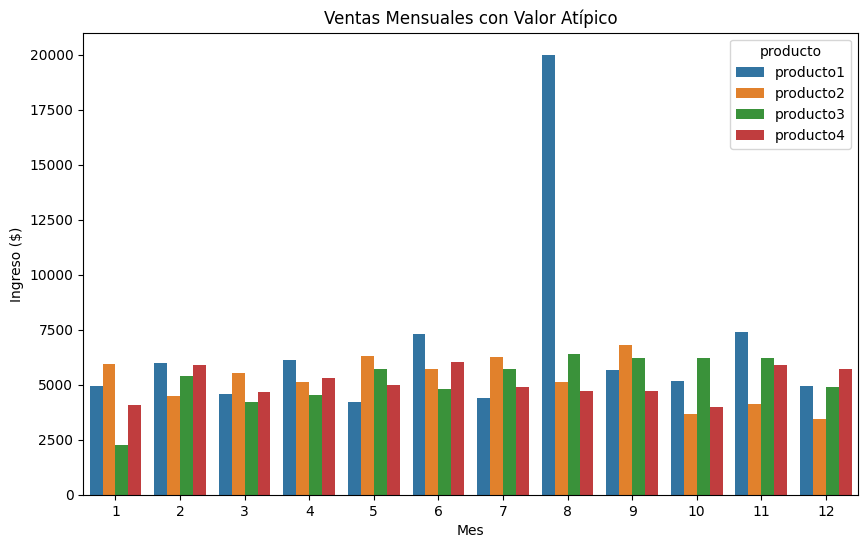

In [1]:
# Identificación de Datos Atípicos y Errores

# Cargamos las librerías necesarias
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Generamos datos ficticios de ventas mensuales
ventas_prod1 = np.random.normal(loc=5000, scale=1000, size=12)
ventas_prod2 = np.random.normal(loc=5000, scale=1000, size=12)
ventas_prod3 = np.random.normal(loc=5000, scale=1000, size=12)
ventas_prod4 = np.random.normal(loc=5000, scale=1000, size=12)

# Agregamos un valor atípico en Agosto para el producto1
ventas_prod1[7] = 20000

# Creamos un diccionario con los datos relevantes (ventas, mes y productos)
datos = {
    'ventas': np.concatenate([ventas_prod1, ventas_prod2, ventas_prod3, ventas_prod4]),
    'mes': list(np.arange(1, 13))*4,
    'producto': ['producto1']*12 + ['producto2']*12+ ['producto3']*12+['producto4']*12
         }

# Juntamos columnas en un df para usar seaborn
ventas_df = pd.DataFrame(datos)


# Creamos un gráfico de barras para visualizar las ventas
plt.figure(figsize=(10, 6))
ax = sns.barplot(y='ventas', x = 'mes', hue='producto', data=ventas_df)
plt.title('Ventas Mensuales con Valor Atípico')
plt.xlabel('Mes')
plt.ylabel('Ingreso ($)')
plt.show()

In [2]:
# ¿Cómo afecta a la media?

# Miramos la media por producto
ventas_df.groupby('producto').ventas.mean().reset_index().sort_values(by='ventas', ascending=False)

# El producto 1 tiene la media de ventas más alta!

,producto,ventas
0,producto1,6725.851015
2,producto3,5215.608740
1,producto2,5207.565308
3,producto4,5071.173410


In [3]:
# Miramos la media por mes
ventas_df.groupby('mes').ventas.mean().reset_index().sort_values(by='ventas', ascending=False)

# El mes de agosto tiene la media de ventas más alta!

,mes,ventas
7,8,9054.213863
5,6,5960.118016
10,11,5919.231478
8,9,5851.682768
1,2,5442.658601
4,5,5308.315655
6,7,5305.714985
3,4,5259.884418
9,10,4763.559339
11,12,4742.034097


In [4]:
# Sin embargo, ¿qué pasa cuando corregimos el outlier?

# Vamos a sustituir el valor anómalo por la media del producto1

# Calculamos la media del producto1
valor_nuevo = ventas_df[ventas_df.producto=='producto1'].ventas.mean()

# Hacemos una copia del df para modificar
ventas_nuevo_df = ventas_df.copy()

# Substituimos el outlier (20k) por la media
ventas_nuevo_df.ventas = ventas_nuevo_df.ventas.replace(20000, valor_nuevo)

# Miramos la media por mes
ventas_nuevo_df.groupby('mes').ventas.mean().reset_index().sort_values(by='ventas', ascending=False)

# Ahora el mes de agosto ya no tiene las ventas más altas!

,mes,ventas
5,6,5960.118016
10,11,5919.231478
8,9,5851.682768
7,8,5735.676617
1,2,5442.658601
4,5,5308.315655
6,7,5305.714985
3,4,5259.884418
9,10,4763.559339
11,12,4742.034097


#### 2.2 Corrección de Datos Faltantes (Missings)

Los datos reales no son perfectos, de hecho es muy común que haya columnas o filas sin algún valor. Estos datos que faltan se llaman en inglés *missing values*. Dependiendo del número de missings y de dónde se encuentran, se pueden seguir distintas estrategias de corrección. Los datasets con muchos *missings* se consideran de poco valor/fiabilidad, por lo tanto, se puede usar también como un criterio para descartar datos.

In [5]:
# Detección y corrección de Missings

# Cargamos las librerías necesarias
import pandas as pd
import numpy as np

# Creamos un DataFrame de ejemplo con valores faltantes
datos = {'Nombre': ['Juan', 'María', 'Carlos', np.nan, 'Ana'],
         'Edad': [25, 30, np.nan, 22, 35],
         'Puntuación': [85, 90, 75, np.nan, 88]
         }

df = pd.DataFrame(datos)

# Mostramos el DataFrame original
print("DataFrame original:")
print(df)

# Detectamos los missings
missings_por_columna = df.isnull().sum()
print("\nMissings por columna:")
print(missings_por_columna)

# Posible corrección de missings - substituir por la media de la columna
df['Edad'].fillna(df['Edad'].mean(), inplace=True)
df['Puntuación'].fillna(df['Puntuación'].mean(), inplace=True)

# Mostrar el DataFrame después de la corrección
print("\nDataFrame después de la corrección:")
print(df)

DataFrame original:
   Nombre  Edad  Puntuación
0    Juan  25.0        85.0
1   María  30.0        90.0
2  Carlos   NaN        75.0
3     NaN  22.0         NaN
4     Ana  35.0        88.0

Missings por columna:
Nombre        1
Edad          1
Puntuación    1
dtype: int64

DataFrame después de la corrección:
   Nombre  Edad  Puntuación
0    Juan  25.0        85.0
1   María  30.0        90.0
2  Carlos  28.0        75.0
3     NaN  22.0        84.5
4     Ana  35.0        88.0


<ipython-input-5-7fbf02ae6c30>:25: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Edad'].fillna(df['Edad'].mean(), inplace=True)
<ipython-input-5-7fbf02ae6c30>:26: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try us

#### 2.3 Comprensión de la Distribución de Datos

En un conjunto de datos de ventas, el EDA podría mostrar que la distribución no es uniforme y que la mayoría de los ventas se concentran en ciertos meses. Esta información es crucial para la toma de decisiones empresariales y estrategias de marketing.

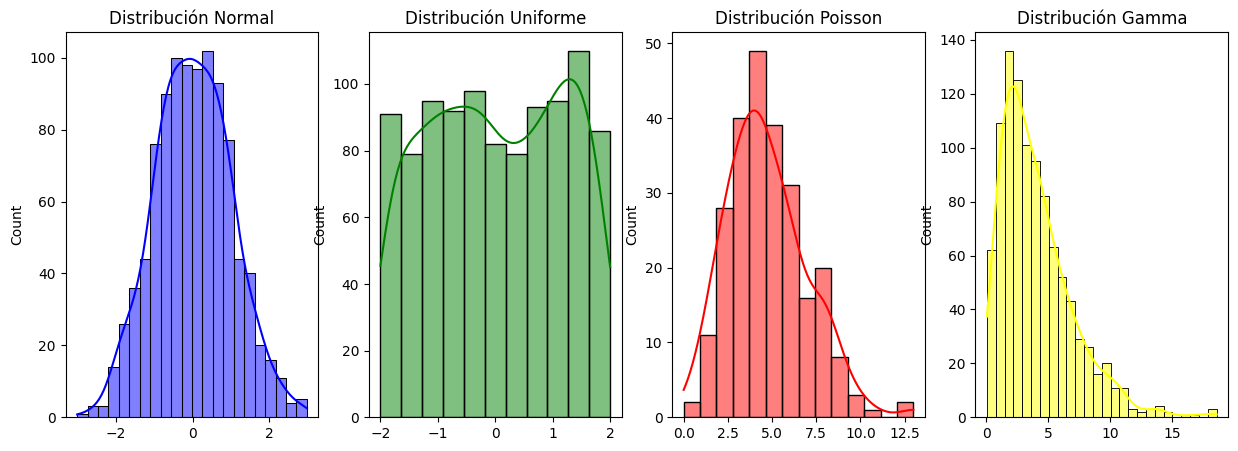

In [6]:
# Analizar la distribución de los datos

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Creamos dos conjuntos de datos con diferentes distribuciones
datos_normal = np.random.normal(loc=0, scale=1, size=1000)
datos_uniforme = np.random.uniform(low=-2, high=2, size=1000)
datos_poisson = np.random.poisson(5, 250)
datos_gamma = np.random.gamma(2, 2, 1000)

# Configuramos subgráficos
fig, axs = plt.subplots(1, 4, figsize=(15, 5))

# Graficamos la distribución normal
sns.histplot(datos_normal, kde=True, ax=axs[0], color='blue')
axs[0].set_title('Distribución Normal')

# Graficamos la distribución uniforme
sns.histplot(datos_uniforme, kde=True, ax=axs[1], color='green')
axs[1].set_title('Distribución Uniforme')

# Graficamos la distribución de Poisson
sns.histplot(datos_poisson, kde=True, ax=axs[2], color='red')
axs[2].set_title('Distribución Poisson')

# Graficamos la distribución Gamma
sns.histplot(datos_gamma, kde=True, ax=axs[3], color='yellow')
axs[3].set_title('Distribución Gamma')

# Mostramos los gráficos
plt.show()

#### 2.4 Relaciones y Correlaciones entre Variables

En el mismo conjunto de datos de ventas, el EDA podría revelar una fuerte correlación entre el augmento de ventas de unos productos y una campaña de marketing específica. Esta información podría guiar la asignación de presupuestos publicitarios de manera más efectiva.

In [7]:
# Correlación entre Variables

# Cargamos las librerías necesarias
import numpy as np
import matplotlib.pyplot as plt

# Generamos datos de ejemplo
variable1 = np.random.rand(100)  # Variable 1
variable2 = 2 * variable1 + 1 + 0.1 * np.random.randn(100)  # Variable 2 correlacionada con 1
variable3 = np.random.randn(100)  # Variable 3

# Calculamos la correlación entre las variables 1 y 2
correlacion1_2 = np.corrcoef(variable1, variable2)[0, 1]

# Calculamos la correlación entre las variables 1 y 3
correlacion1_3 = np.corrcoef(variable1, variable3)[0, 1]

# Mostramos las correlaciones
print(f"Correlación entre las variables 1 y 2: {correlacion1_2}")
print(f"Correlación entre las variables 1 y 3: {correlacion1_3}")

Correlación entre las variables 1 y 2: 0.9820033958973249
Correlación entre las variables 1 y 3: -0.02758475165697909


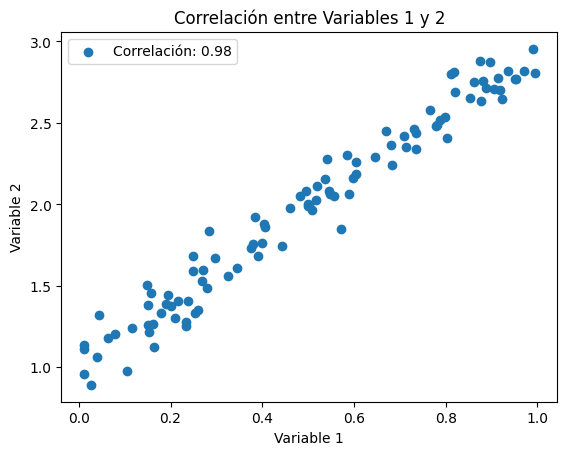

In [8]:
# Visualizamos la relación entre las variables 1 y 2

plt.scatter(variable1, variable2, label=f"Correlación: {correlacion1_2:.2f}")
plt.title('Correlación entre Variables 1 y 2')
plt.xlabel('Variable 1')
plt.ylabel('Variable 2')
plt.legend()
plt.show()


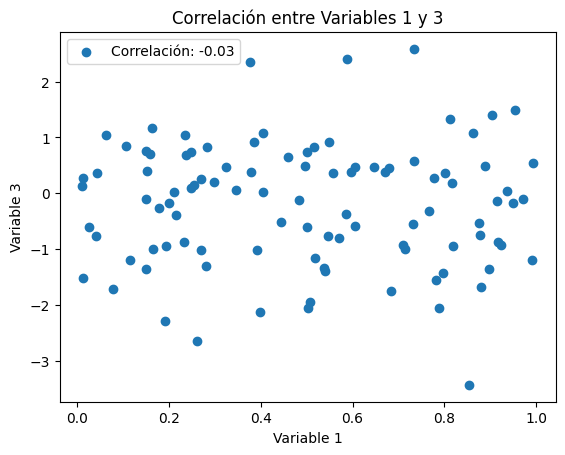

In [9]:
# Visualizamos la relación entre las variables 1 y 3

plt.scatter(variable1, variable3, label=f"Correlación: {correlacion1_3:.2f}")
plt.title('Correlación entre Variables 1 y 3')
plt.xlabel('Variable 1')
plt.ylabel('Variable 3')
plt.legend()
plt.show()

#### 2.5 Selección de Variables Relevantes

En un conjunto de datos con muchas variables, el EDA podría resaltar cuáles son más relevantes para el problema en cuestión. Esto ahorra tiempo y recursos al centrarse en las variables más informativas.


#### 2.6 Validación de Supuestos para Modelos Estadísticos

Antes de aplicar un modelo de regresión lineal, el EDA puede mostrar si las variables están linealmente relacionadas y si los residuos siguen una distribución normal. Validar estos puntos augmenta la confianza de los resultados del modelo.


#### 2.7 Visualización de Datos para Comunicación Efectiva

Utilizar gráficos y visualizaciones durante el EDA puede ayudar a comunicar hallazgos de manera efectiva a partes interesadas no técnicas, facilitando la comprensión y toma de decisiones.

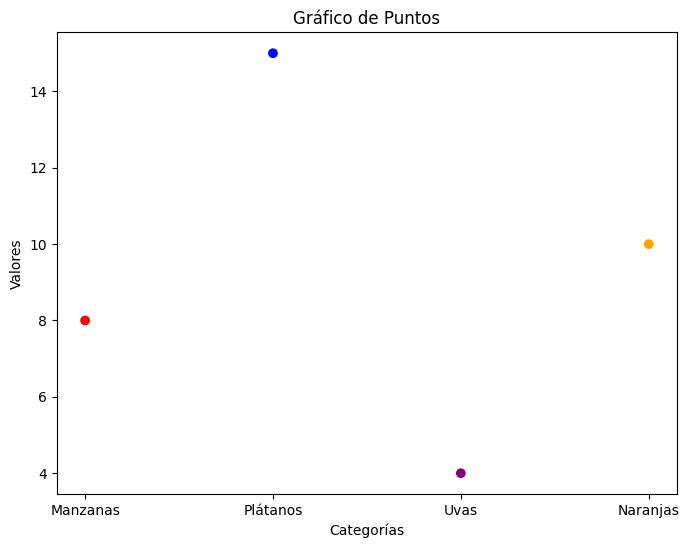

In [10]:
# Importancia de escoger el gráfico adecuado

# ¿Qué gráfico es mejor para comparar el número de frutas?

# Cargamos la librería
import matplotlib.pyplot as plt

# Datos a graficar
categorias = ['Manzanas', 'Plátanos', 'Uvas', 'Naranjas']
valores = [8, 15, 4, 10]

# Creamos un gráfico de puntos
plt.figure(figsize=(8, 6))
plt.scatter(categorias, valores, color=['red', 'blue', 'purple', 'orange'])
plt.title('Gráfico de Puntos')
plt.xlabel('Categorías')
plt.ylabel('Valores')
plt.show()

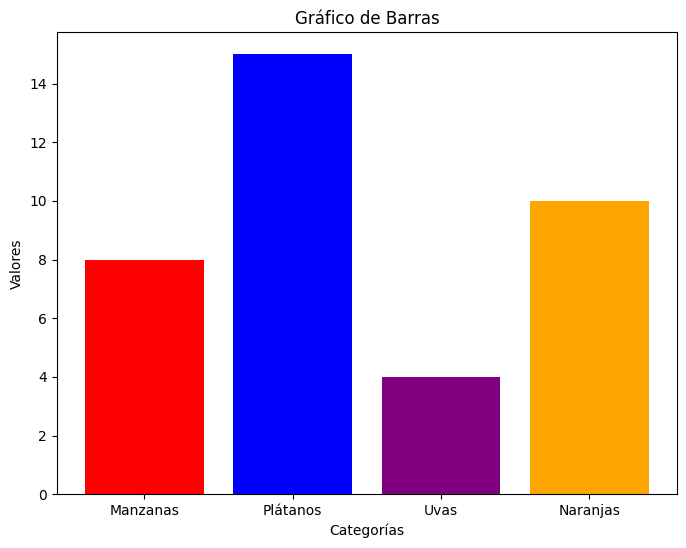

In [11]:
# Creamos un gráfico de barras
plt.figure(figsize=(8, 6))
plt.bar(categorias, valores, color=['red', 'blue', 'purple', 'orange'])
plt.title('Gráfico de Barras')
plt.xlabel('Categorías')
plt.ylabel('Valores')
plt.show()

# ¡El gráfico de barras parece más adecuado para comparar los valores!

 Estos ejemplos destacan cómo el EDA proporciona insights cruciales que afectan la calidad y validez de los análisis y modelos que se aplicarán posteriormente. Además, ayuda a evitar interpretaciones incorrectas o decisiones basadas en datos sesgados o incorrectos.